# Color Feature Extraction Using K-Means 

## Color Extraction

useful for palette generation, or image segmentation with color similarities.

Clustering is usefull to group the simila colors. Clustering not require the labelled data, so we didnt need to make the label again. 

with this grouping method, we didnt need to analyzing each pixel, dominant color also be able to extract with centraid value, 

# Fundamentals of K-Means Clustering

Clustering = Grouping by similar data's feature.
How Similarity is Measured?
- its determine by datas distance from centroid
- For 1 D, simple just the 1 number
- For 2 D, we need to specified the x and y
- For 3 D, we need to specified x, y and z.
  

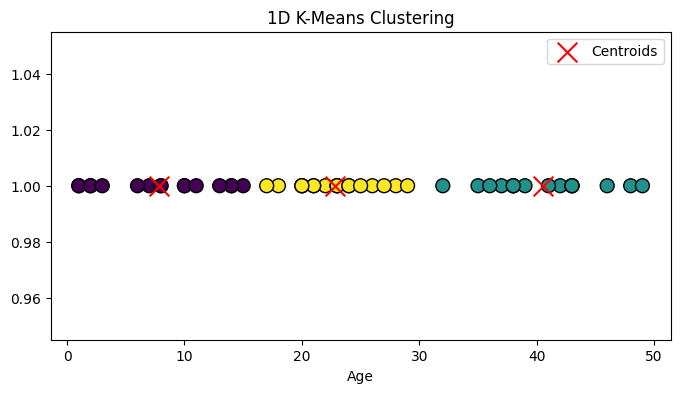

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate random 1D data (ages from 0 to 50)
np.random.seed(42)
ages = np.random.randint(0, 50, 50).reshape(-1, 1)

# Apply K-Means (K=3 clusters)
kmeans_1d = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_1d.fit(ages)
labels_1d = kmeans_1d.labels_
centroids_1d = kmeans_1d.cluster_centers_

# Visualizing the Clustering Result
plt.figure(figsize=(8, 4))
plt.scatter(ages, [1] * len(ages), c=labels_1d, cmap='viridis', edgecolors='k', s=100)
plt.scatter(centroids_1d, [1] * len(centroids_1d), c='red', marker='x', s=200, label="Centroids")
plt.xlabel("Age")
plt.title("1D K-Means Clustering")
plt.legend()
plt.show()

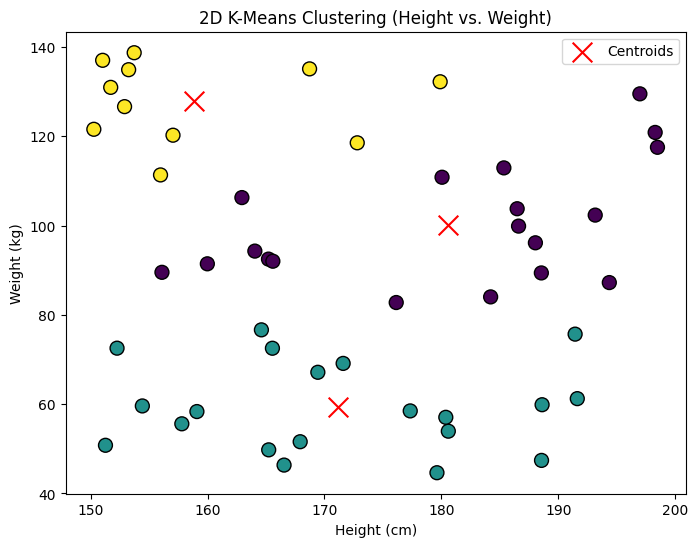

In [2]:
# Generate random 2D data (Height vs. Weight)
np.random.seed(42)
height_weight = np.random.rand(50, 2) * [50, 100] + [150, 40]  # Height (150-200 cm), Weight (40-140 kg)

# Apply K-Means (K=3 clusters)
kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_2d.fit(height_weight)
labels_2d = kmeans_2d.labels_
centroids_2d = kmeans_2d.cluster_centers_

# Visualizing the Clustering Result
plt.figure(figsize=(8, 6))
plt.scatter(height_weight[:, 0], height_weight[:, 1], c=labels_2d, cmap='viridis', edgecolors='k', s=100)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("2D K-Means Clustering (Height vs. Weight)")
plt.legend()
plt.show()

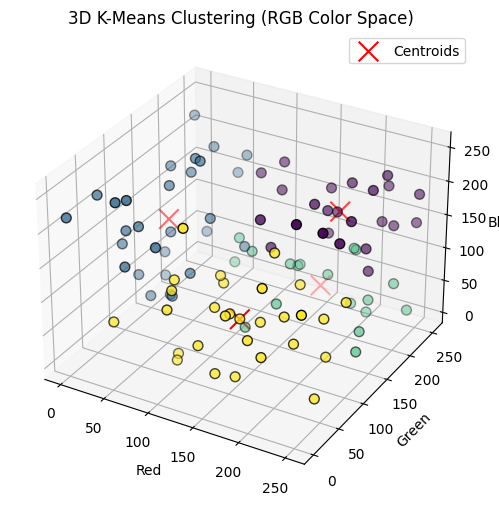

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Generate random 3D data (RGB colors)
np.random.seed(42)
rgb_colors = np.random.randint(0, 255, (100, 3))  # R, G, B values (0-255)

# Apply K-Means (K=4 clusters)
kmeans_3d = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_3d.fit(rgb_colors)
labels_3d = kmeans_3d.labels_
centroids_3d = kmeans_3d.cluster_centers_

# Visualizing the Clustering Result in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rgb_colors[:, 0], rgb_colors[:, 1], rgb_colors[:, 2], c=labels_3d, cmap='viridis', edgecolors='k', s=50)
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='red', marker='x', s=200, label="Centroids")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.set_title("3D K-Means Clustering (RGB Color Space)")
plt.legend()
plt.show()

## FULL PROCESS OF K-MEANS CLUSTERING
![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*z0h0Xvz2OXD6X4qZT6aVQQ.jpeg)


- Step 1 : we need to determine value of k, that is how much k we want. optimizing using Elbow Method on step 7
- Step 2 : initialize the centroid of each k(this can be random), then evaluated for the best centroid number using K-Means++
- Step 3 : measure euclidean distance between each data point and every centroid
- Step 4 : each point is defined to its nearest centroid, all data point is clustered or grouped to each cluster
- Step 5 : Update centroid number by taking mean od all data point.
- Step 6 : Check the convergence, convergence is simply mean there is no significantly change of centroid between x iteration and x-1 iteration, if it is repeat step3-6. otherwise stop
- Step 7 : Evaluate the optimal k using elbow method to determine the best number for cluster
- Step 8 : Clustering result that is data that grouping to each centroid that have similar properties


The point of the process is to search for best value for centroid and also how much k it self.

![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*tn6tQJbbheYLZ30Ujs99VA.png)


# 0. Data

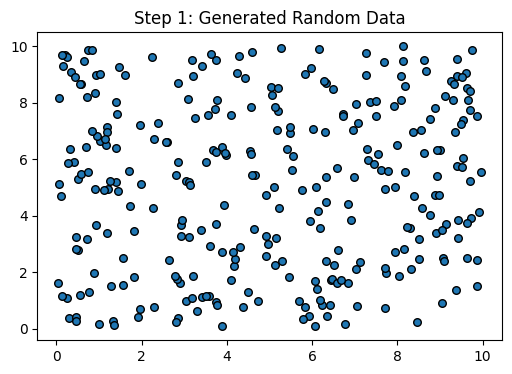

In [54]:
np.random.seed(42)
X = np.random.rand(300, 2) * 10  # Random points in a 10x10 space
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=30, edgecolors='k')
plt.title("Step 1: Generated Random Data")
plt.show()


# 1. Determine K(Cluster)


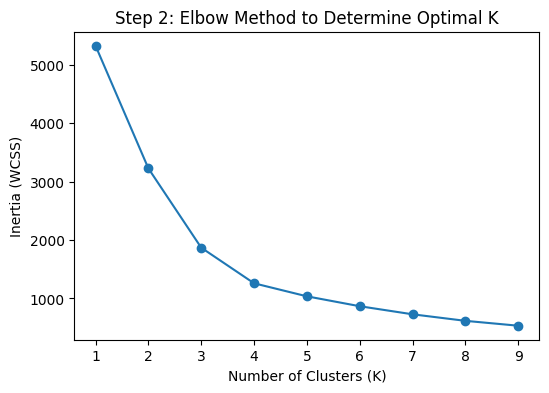

In [33]:
inertia_values = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Step 2: Elbow Method to Determine Optimal K")
plt.show()

# 2. Determine C(Centroid)

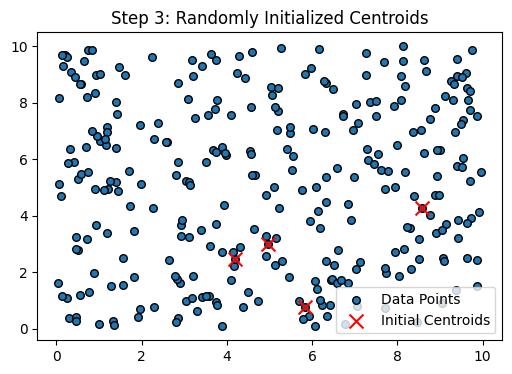

In [34]:
# Choose k (based on the elbow point)
k = 4

# Step 3: Initialize K Centroids Randomly
random_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=30, edgecolors='k', label="Data Points")
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], color='red', marker='x', s=100, label="Initial Centroids")
plt.title("Step 3: Randomly Initialized Centroids")
plt.legend()
plt.show()


# 3. Eucledian Distance

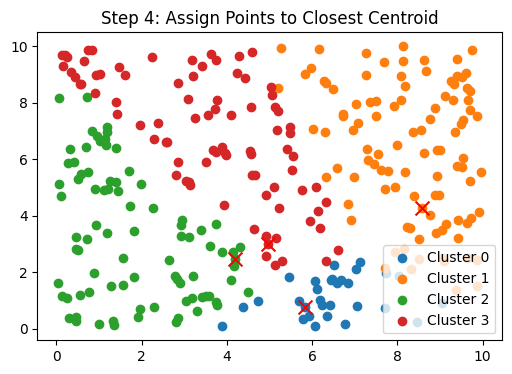

In [36]:
# Step 4: Assign Each Point to the Nearest Centroid
distances = cdist(X, random_centroids, 'euclidean')
clusters = np.argmin(distances, axis=1)
plt.figure(figsize=(6, 4))
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], color='red', marker='x', s=100)
plt.title("Step 4: Assign Points to Closest Centroid")
plt.legend()
plt.show()

# 4. Update Centroid

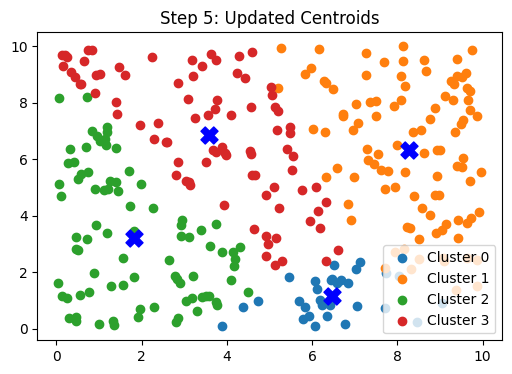

In [38]:
# Step 5: Update Centroids
new_centroids = np.array([X[clusters == i].mean(axis=0) if np.any(clusters == i) else random_centroids[i] for i in range(k)])
plt.figure(figsize=(6, 4))
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='blue', marker='X', s=150)
plt.title("Step 5: Updated Centroids")
plt.legend()
plt.show()

# 5. Convergence

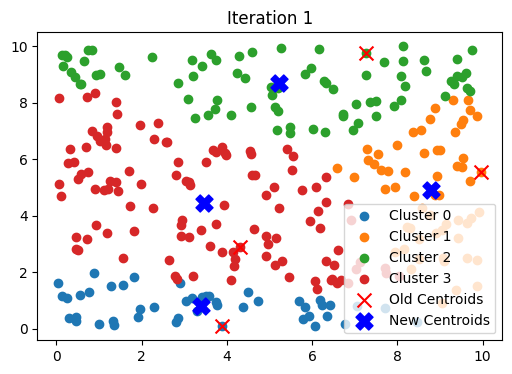

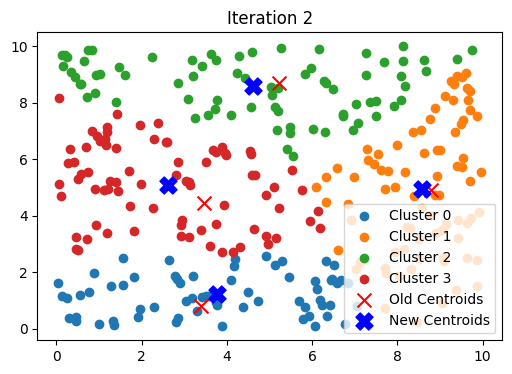

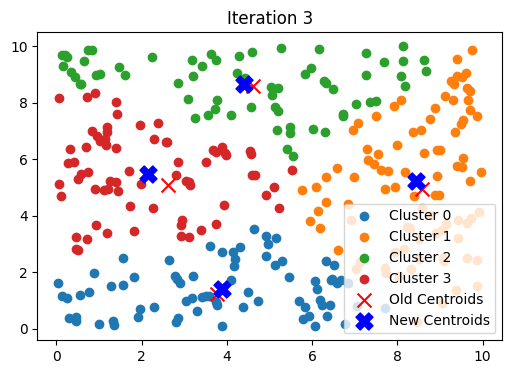

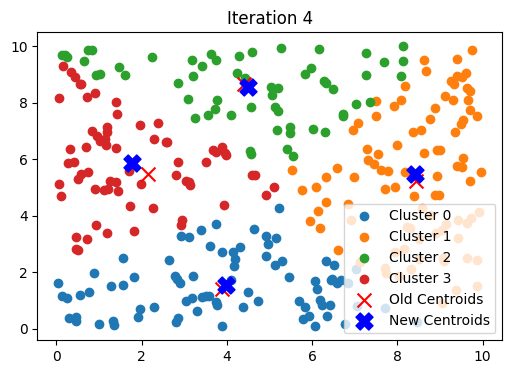

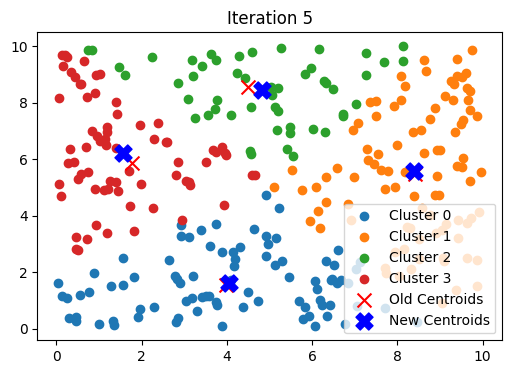

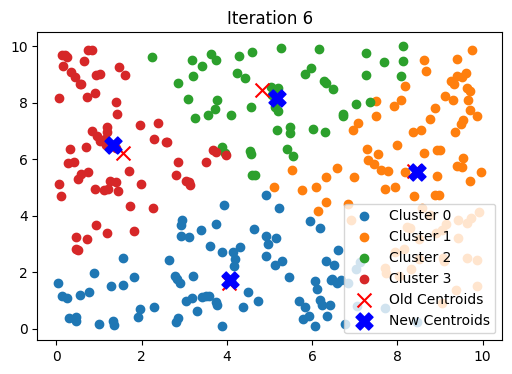

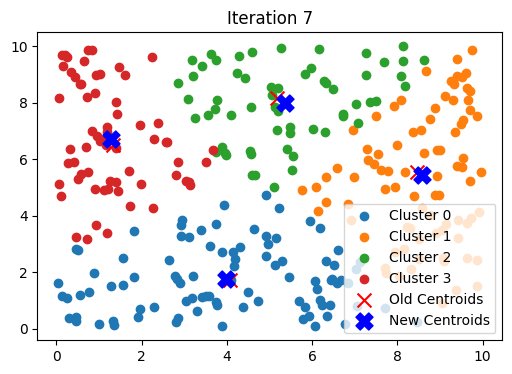

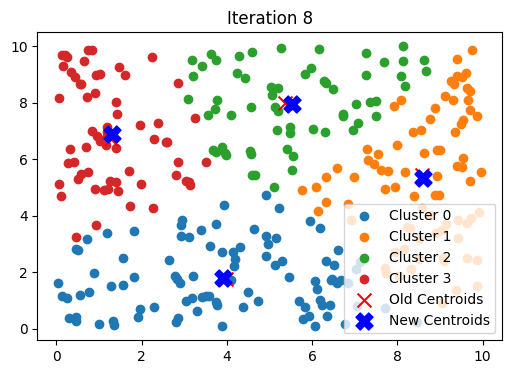

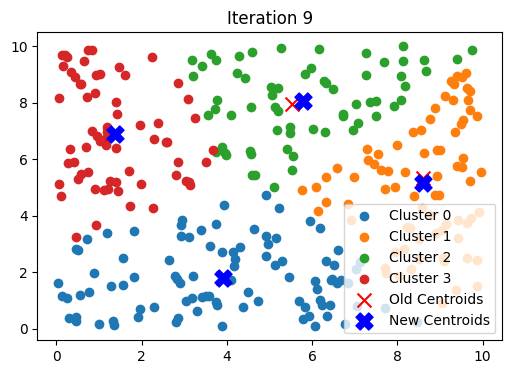

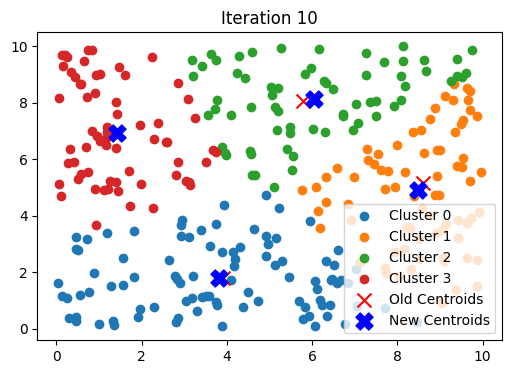

In [39]:
# Step 6: Iterate Until Convergence
def kmeans_convergence(X, k, max_iter=10):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for iteration in range(max_iter):
        distances = cdist(X, centroids, 'euclidean')
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([X[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)])
        
        # Visualization of centroid movement
        plt.figure(figsize=(6, 4))
        for i in range(k):
            plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label="Old Centroids")
        plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='blue', marker='X', s=150, label="New Centroids")
        plt.title(f"Iteration {iteration+1}")
        plt.legend()
        plt.show()
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

clusters, final_centroids = kmeans_convergence(X, k)

# 6. Final Result

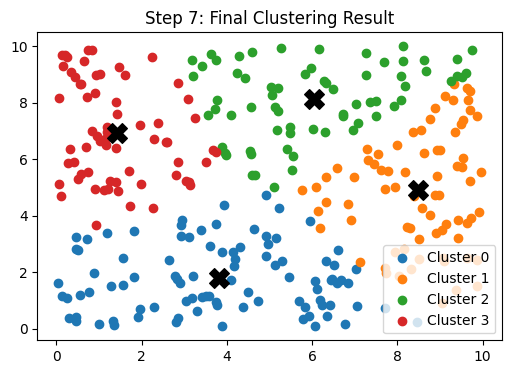

In [41]:
# Step 7: Final Clustering Result
plt.figure(figsize=(6, 4))
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='black', marker='X', s=200)
plt.title("Step 7: Final Clustering Result")
plt.legend()
plt.show()


# For 3 Dimentional Data

# Step 1: Generate 3D Data

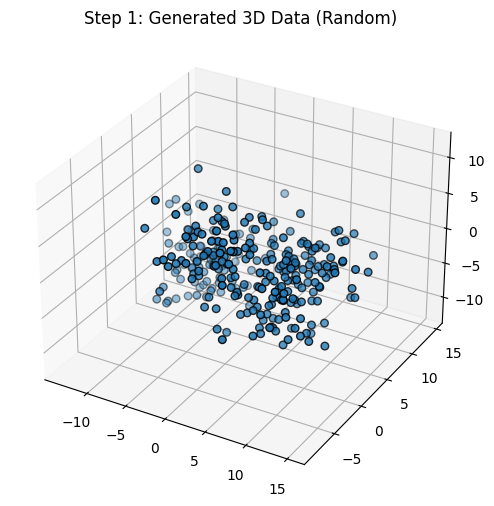

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate 3D Data Randomly
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=3.0, n_features=3)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=30, edgecolors='k')
ax.set_title("Step 1: Generated 3D Data (Random)")
plt.show()

# Step 2: Determine k using the Elbow Method

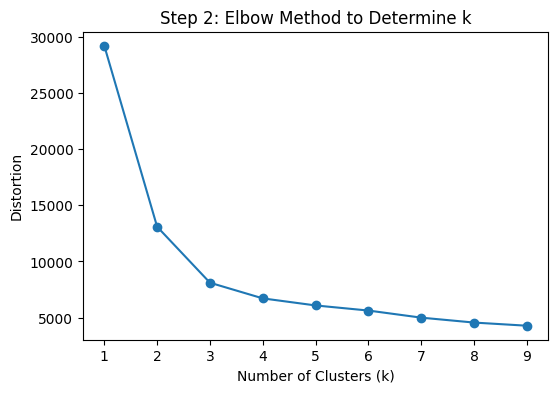

In [61]:
distortions = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, distortions, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.title("Step 2: Elbow Method to Determine k")
plt.show()

# Step 3: Initialize K Centroids

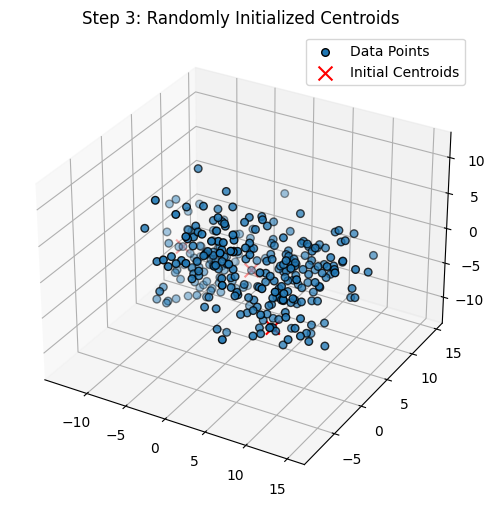

In [62]:
k = 3  # Chosen from the Elbow Method
random_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=30, edgecolors='k', label="Data Points")
ax.scatter(random_centroids[:, 0], random_centroids[:, 1], random_centroids[:, 2], color='red', marker='x', s=100, label="Initial Centroids")
ax.set_title("Step 3: Randomly Initialized Centroids")
ax.legend()
plt.show()

# Step 4: Euclidean Distance (Assign Each Point to the Nearest Centroid)

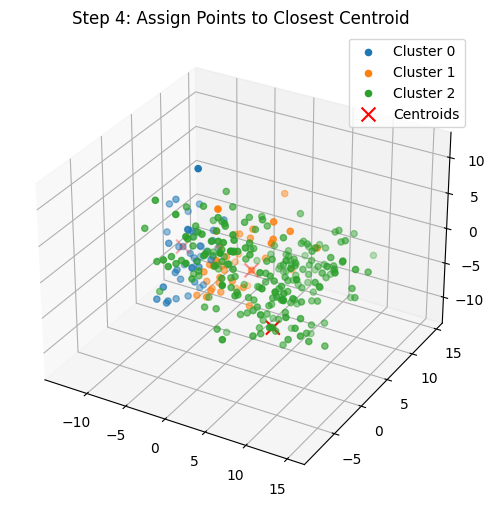

In [63]:
distances = cdist(X, random_centroids, 'euclidean')
clusters = np.argmin(distances, axis=1)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    ax.scatter(X[clusters == i, 0], X[clusters == i, 1], X[clusters == i, 2], label=f'Cluster {i}')
ax.scatter(random_centroids[:, 0], random_centroids[:, 1], random_centroids[:, 2], color='red', marker='x', s=100, label="Centroids")
ax.set_title("Step 4: Assign Points to Closest Centroid")
ax.legend()
plt.show()

# Step 5: Update Centroids

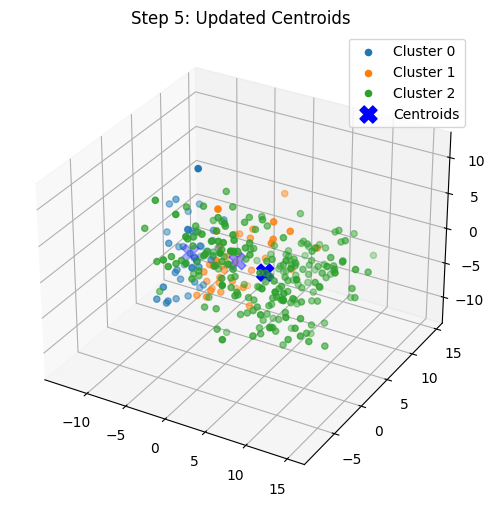

In [65]:
new_centroids = np.array([X[clusters == i].mean(axis=0) if np.any(clusters == i) else random_centroids[i] for i in range(k)])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    ax.scatter(X[clusters == i, 0], X[clusters == i, 1], X[clusters == i, 2], label=f'Cluster {i}')
ax.scatter(new_centroids[:, 0], new_centroids[:, 1], new_centroids[:, 2], color='blue', marker='X', s=150, label="Centroids")
ax.set_title("Step 5: Updated Centroids")
ax.legend()
plt.show()

# Step 6: Iterate Until Convergence

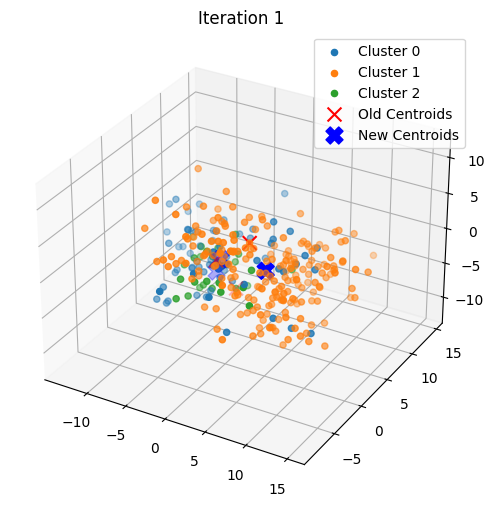

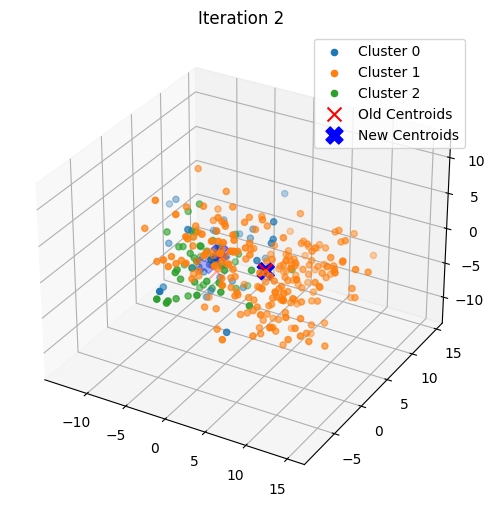

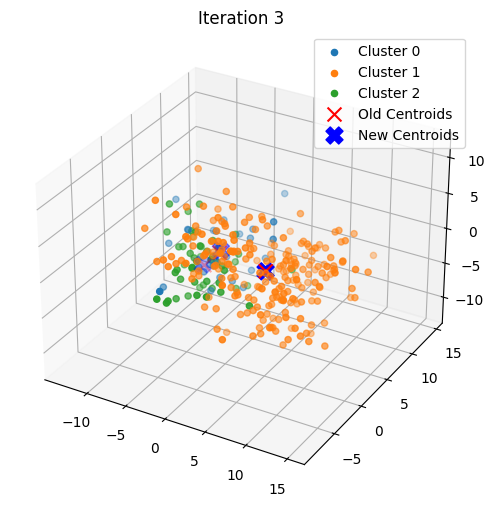

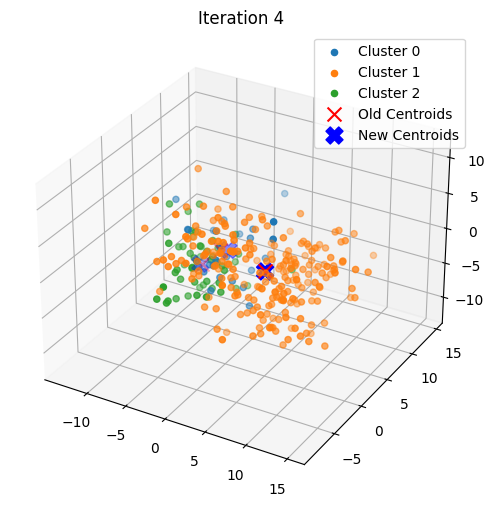

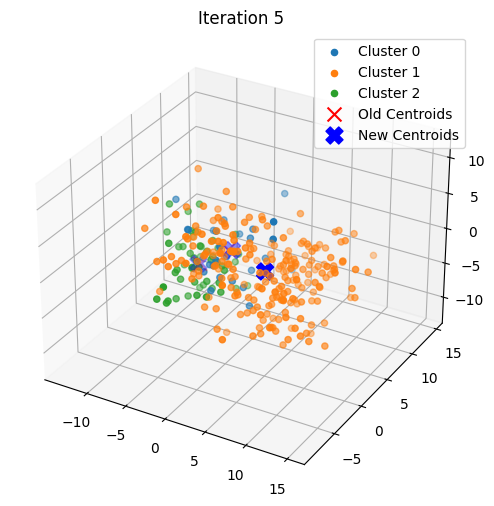

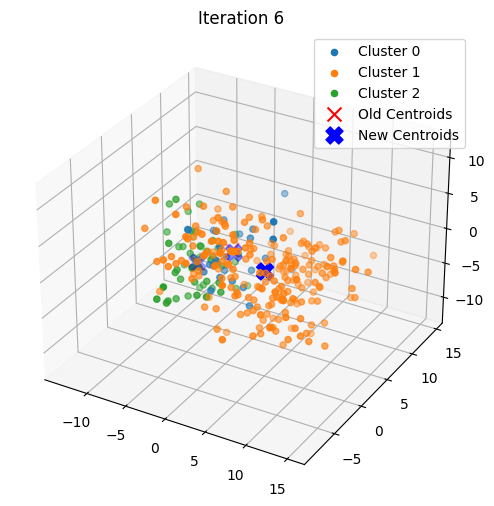

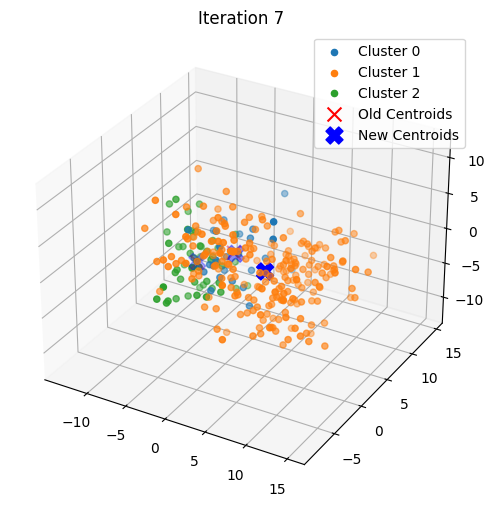

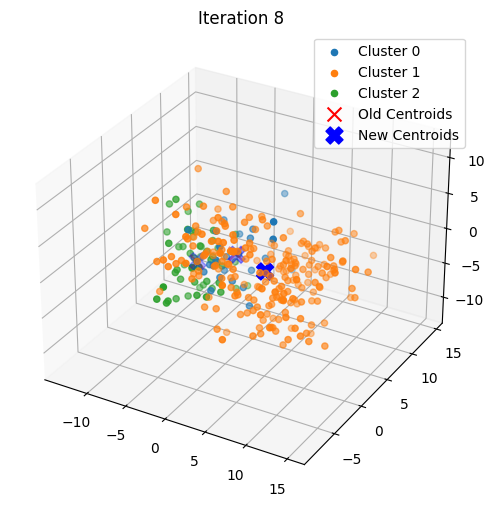

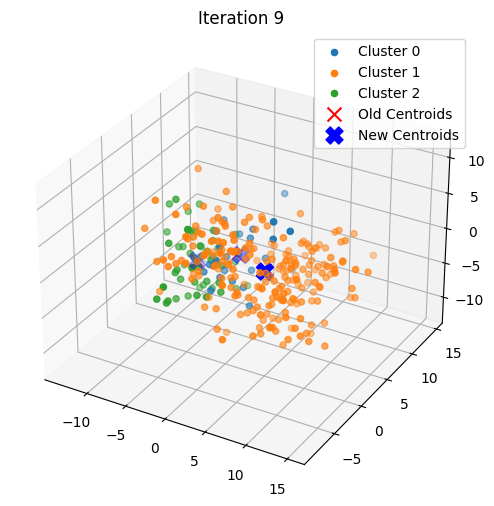

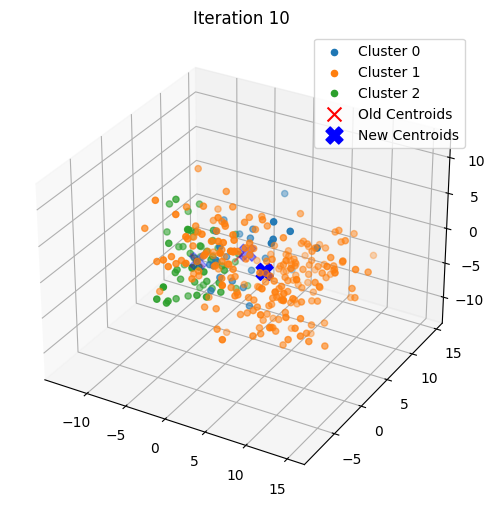

In [66]:
def kmeans_convergence(X, k, max_iter=10):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for iteration in range(max_iter):
        distances = cdist(X, centroids, 'euclidean')
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([X[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)])
        
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        for i in range(k):
            ax.scatter(X[clusters == i, 0], X[clusters == i, 1], X[clusters == i, 2], label=f'Cluster {i}')
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='red', marker='x', s=100, label="Old Centroids")
        ax.scatter(new_centroids[:, 0], new_centroids[:, 1], new_centroids[:, 2], color='blue', marker='X', s=150, label="New Centroids")
        ax.set_title(f"Iteration {iteration+1}")
        ax.legend()
        plt.show()
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

clusters, final_centroids = kmeans_convergence(X, k)

# Step 7: Final Clustering Result

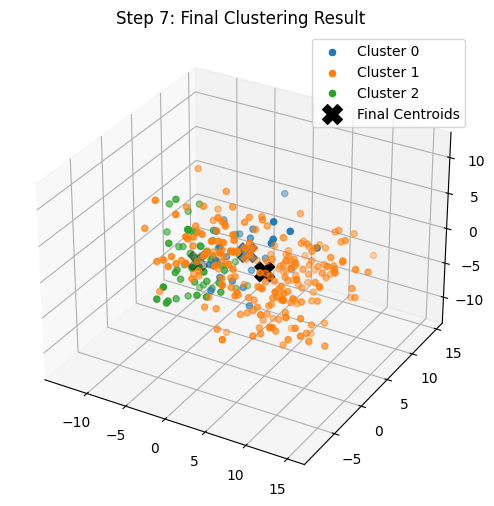

In [67]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    ax.scatter(X[clusters == i, 0], X[clusters == i, 1], X[clusters == i, 2], label=f'Cluster {i}')
ax.scatter(final_centroids[:, 0], final_centroids[:, 1], final_centroids[:, 2], color='black', marker='X', s=200, label="Final Centroids")
ax.set_title("Step 7: Final Clustering Result")
ax.legend()
plt.show()

# Implementing to Color Extraction

# Step 1: Load Image & Preprocess

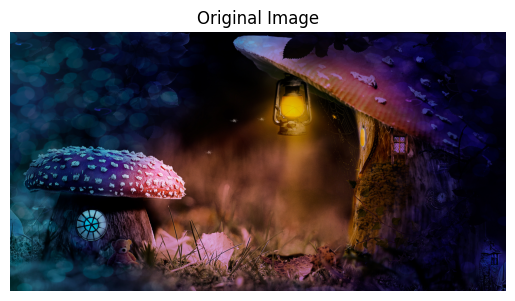

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return image

image_path = "ex.jpg"  # Replace with your image file
image = load_image(image_path)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Step 2: Reshape Image (Vektor)

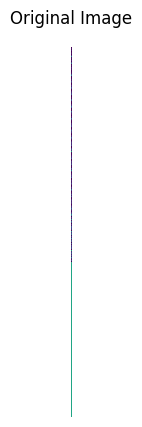

In [45]:
# Reshape image to 2D array (num_pixels, 3)
data = image.reshape((-1, 3))

plt.imshow(data)
plt.title("Original Image")
plt.axis("off")
plt.show()

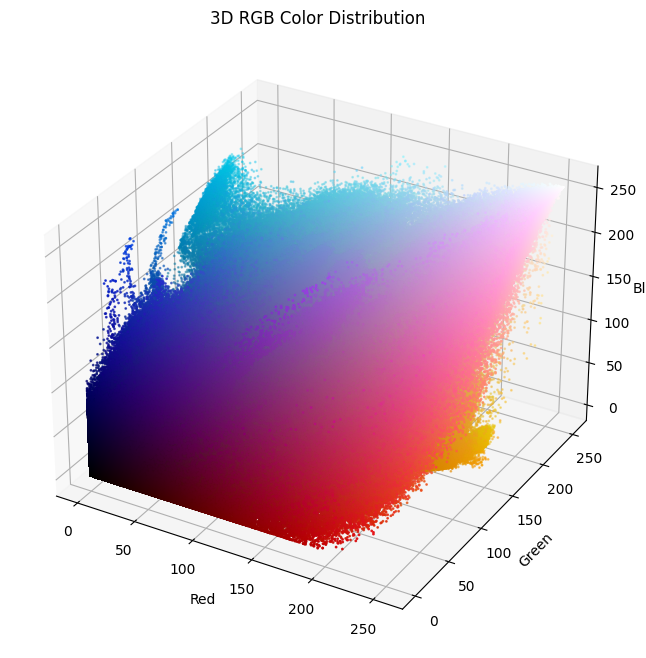

In [46]:
# Reshape image to 2D array (num_pixels, 3)
data = image.reshape((-1, 3))

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of pixel colors in 3D RGB space
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data / 255.0, marker='o', s=1)

# Labels and title
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('3D RGB Color Distribution')

plt.show()

# Step 3: Determine Optimal k using Elbow Method

In [ ]:
distortions = []
k_values = range(1, 1000)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

plt.plot(k_values, distortions, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Step 4: Apply K-Means Clustering

# Step 4.1 : Data Image

In [52]:
image = cv2.imread('ex.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Reshape image into a 2D array of pixels (num_pixels, 3)
data = image.reshape((-1, 3))
data = np.float32(data)  # Convert to float for better processing


# Step 4.2 : Randomly Initialize Centroids

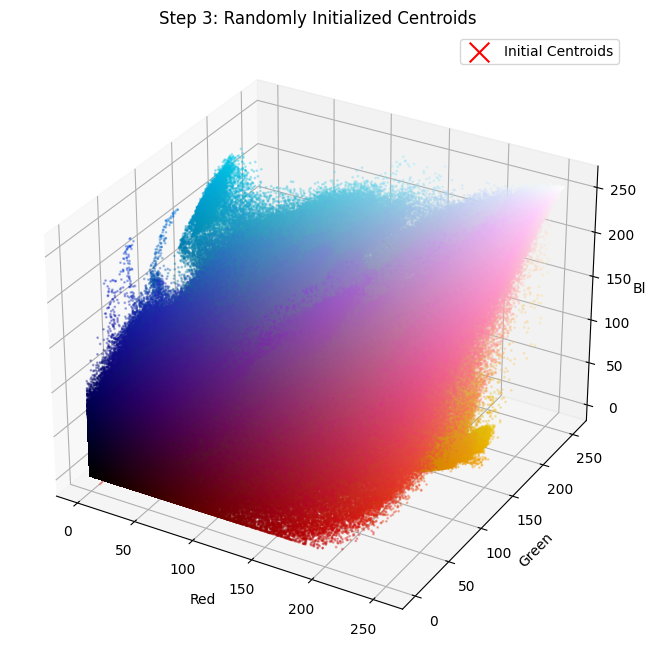

In [53]:
np.random.seed(42)
random_centroids = data[np.random.choice(data.shape[0], 5, replace=False)]

# Visualizing the Initial Centroids in 3D RGB Space
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data / 255.0, marker='o', s=1, alpha=0.3)
ax.scatter(random_centroids[:, 0], random_centroids[:, 1], random_centroids[:, 2], 
           color='red', marker='x', s=200, label="Initial Centroids")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.set_title('Step 3: Randomly Initialized Centroids')
ax.legend()
plt.show()

# Step 4.3 : Assign Each Pixel to the Nearest Centroid

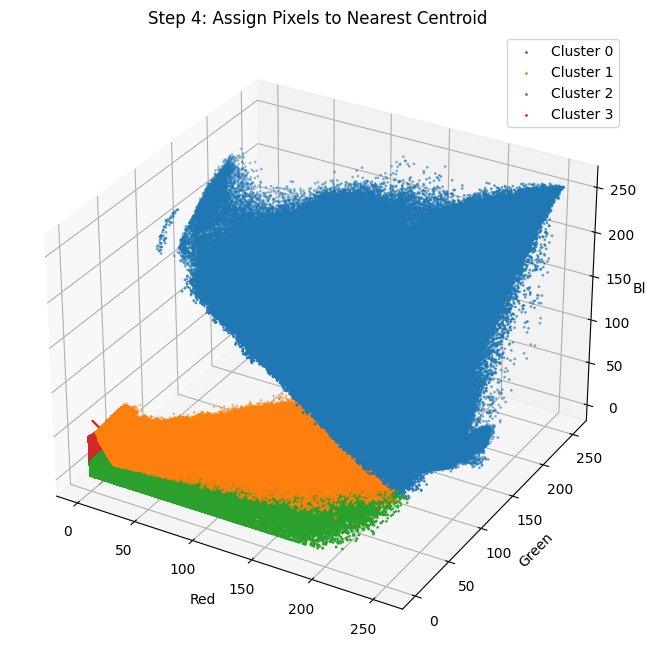

In [54]:
distances = cdist(data, random_centroids, 'euclidean')
clusters = np.argmin(distances, axis=1)

# Visualizing Clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
    ax.scatter(data[clusters == i, 0], data[clusters == i, 1], data[clusters == i, 2], 
               label=f'Cluster {i}', s=1)
ax.scatter(random_centroids[:, 0], random_centroids[:, 1], random_centroids[:, 2], 
           color='red', marker='x', s=200)
ax.set_title("Step 4: Assign Pixels to Nearest Centroid")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
plt.show()

# Step 4.4: Update Centroids

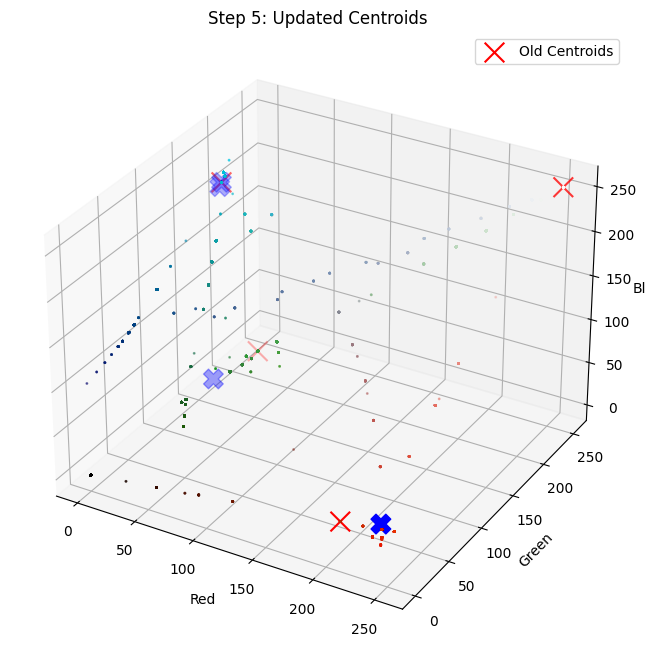

In [41]:
new_centroids = np.array([data[clusters == i].mean(axis=0) if np.any(clusters == i) else random_centroids[i] for i in range(k)])

# Visualizing Updated Centroids
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data / 255.0, marker='o', s=1, alpha=0.3)
ax.scatter(random_centroids[:, 0], random_centroids[:, 1], random_centroids[:, 2], 
           color='red', marker='x', s=200, label="Old Centroids")
ax.scatter(new_centroids[:, 0], new_centroids[:, 1], new_centroids[:, 2], 
           color='blue', marker='X', s=200)
ax.set_title("Step 5: Updated Centroids")
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
ax.legend()
plt.show()


# Step 4.5: Iterate Until Convergence

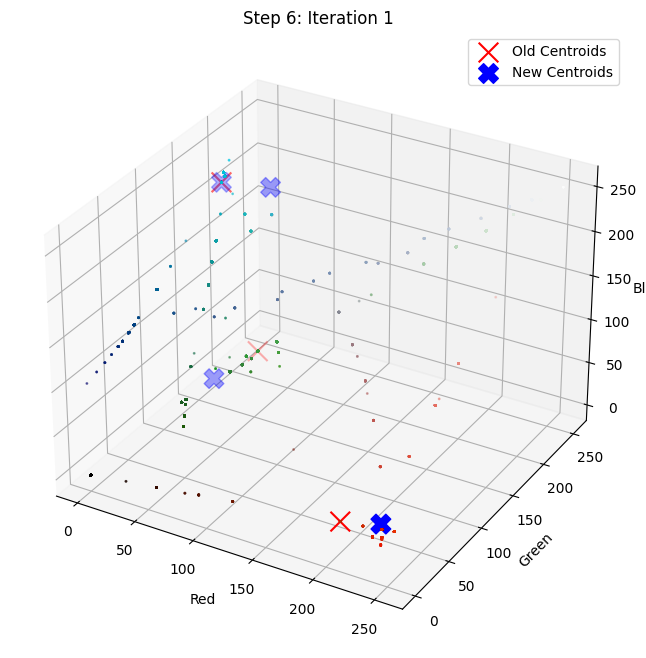

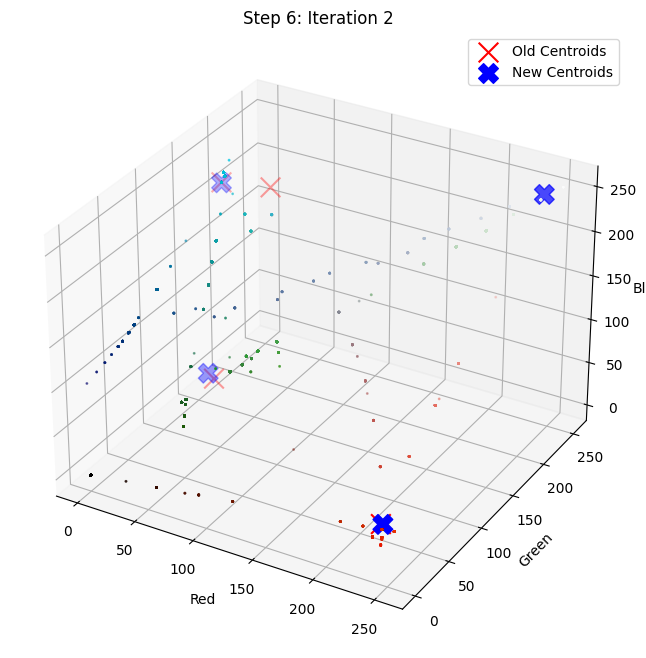

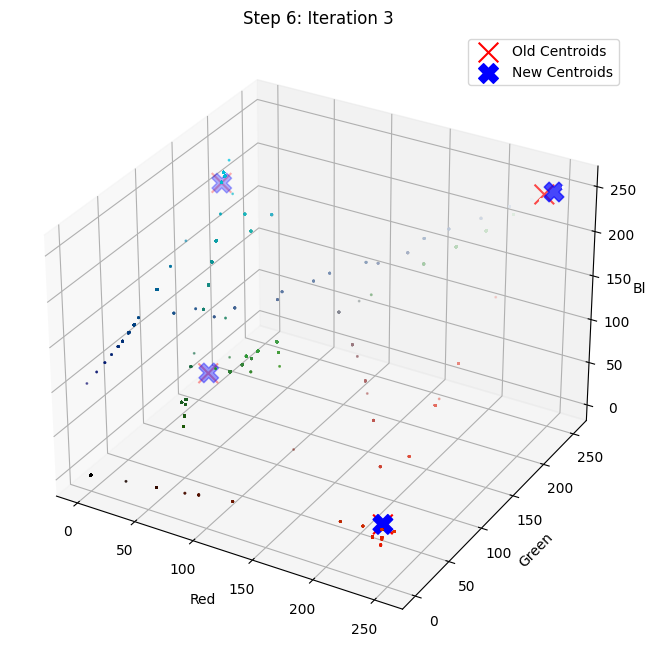

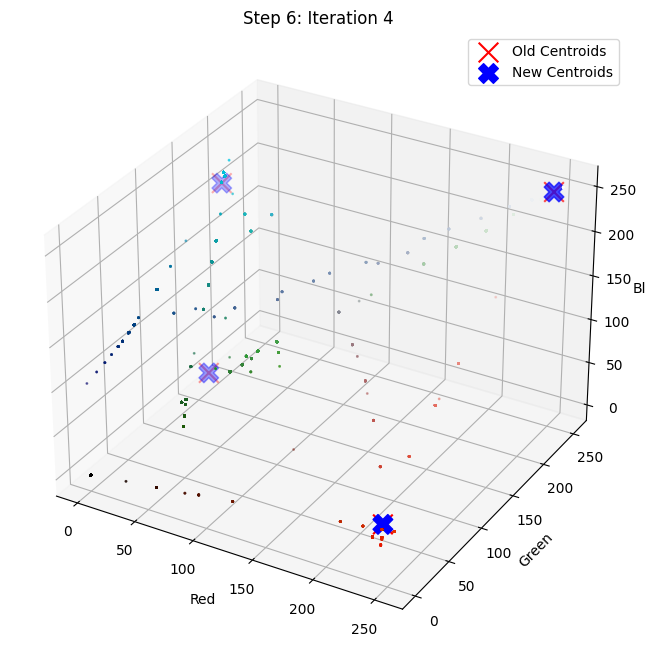

In [42]:
def kmeans_convergence(data, k, max_iter=10):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for iteration in range(max_iter):
        distances = cdist(data, centroids, 'euclidean')
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)])

        # Visualization of each iteration
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data / 255.0, marker='o', s=1, alpha=0.3)
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='red', marker='x', s=200, label="Old Centroids")
        ax.scatter(new_centroids[:, 0], new_centroids[:, 1], new_centroids[:, 2], color='blue', marker='X', s=200, label="New Centroids")
        ax.set_title(f"Step 6: Iteration {iteration + 1}")
        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')
        ax.legend()
        plt.show()

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

clusters, final_centroids = kmeans_convergence(data, k)

# Step 5: Extract Dominant Colors

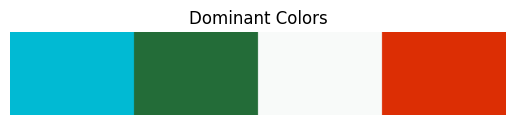

In [7]:
centroids = np.uint8(centroids)  # Convert back to integer RGB

def plot_colors(centroids):
    palette = np.zeros((50, 300, 3), dtype=np.uint8)
    step = 300 // k
    for i, color in enumerate(centroids):
        palette[:, i * step:(i + 1) * step, :] = color
    return palette

plt.imshow(plot_colors(centroids))
plt.title("Dominant Colors")
plt.axis("off")
plt.show()


# Step 6: Reconstruct Image Using Clustered Colors

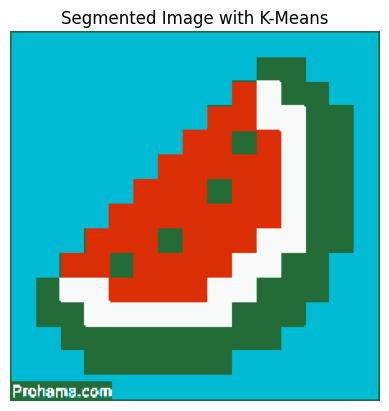

In [8]:
segmented_image = centroids[labels].reshape(image.shape)
plt.imshow(segmented_image)
plt.title("Segmented Image with K-Means")
plt.axis("off")
plt.show()

# RELEVANT CONCEPT

## Measuring Distance or Similarity

### Euclidian Distance

for 2 point, we use this method to calculate distance between point in straight line, 

![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*QrmUIHjsoYNBANEV250s7Q.jpeg)

## Measuring Accuracy of K-Means

### Silhoutte Coefficient

silhoutte score is a matric used to calculate the godness of our clustering, range between -1 to 1. 1 means the mean is well apart form each other and absolutely distinguish, and 0 means distance between cluster is not significant.Misclassified, meaning  i  is closer to another cluster than its own
![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*N3Xm52bELqrju_DWLqjyHg.jpeg)
The point in accuracy is to use distance meaure to scaling and  handling outlier.

# Selecting Optimal Value for K

## Elbow Method

![Alt text](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*aSeXkf9At7WSbGy5s_d4vw.png)

Using WCSS value that define the total variation in cluster.

The process is quite simple:

1. Choose different k value like k=2, k=4 ......, k=10.
2. Apply K-Means for Each k, the output is kk cluster that group data nearby the centroid.
3. Calculate WCSS that is sum of square distance of each data point from centroid.
4. Record each WCSS for each k.
5. Compare K vs WCSS in graph, X axis - k values (2,4) an Y axis - WCSS values.
6. Find Elbow Point, that is where WCSS(y) stops decreasing significantly, the elbow point is the optimal k which is is 4


![Alt text](https://miro.medium.com/v2/resize:fit:1340/format:webp/1*BKKH21zsY1vAomA7FxQGHg.png)


## ACTION

# MORE :

Similarity Metrics : 
- Euclidean Distance
- Cosine Similarity

Elbow Method
TF-IDF
BERT

Convergence
